In [1]:
from sys import path
from pathlib import Path

ROOT = Path().resolve().parent
if str(ROOT) not in path:
    path.insert(0, str(ROOT))
    print(f"Added {ROOT} to sys.path")

Added /Users/surelmanda/IncrementalTraining/incrementaltraining to sys.path


In [5]:
from incrementaltraining.utils.dataset_loader import (
    get_dataset_path,
    load_dataset,
    get_data_split,
)

dataset_path = get_dataset_path("data/multiclass_dataset")
df = load_dataset(dataset_path)

print(f"Loaded dataset: {dataset_path.name}, shape = {df.shape}")
df.head()

Loaded dataset: ObesityDataset.csv, shape = (2111, 17)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [10]:
train_df = get_data_split("train")
print(f"Loaded training dataset: shape = {train_df.shape}")
display(train_df.head())


test_df = get_data_split("test")
print(f"Loaded test dataset: shape = {test_df.shape}")
display(test_df.head())


columns_todrop = ["Name", "PassengerId"]
train_df = train_df.drop(columns=columns_todrop)
test_df = test_df.drop(columns=columns_todrop)

print(
    f"Training dataset shape after dropping columns {columns_todrop}: {train_df.shape}"
)
print(f"Test dataset shape after dropping columns {columns_todrop}: {test_df.shape}")

Loaded training dataset: shape = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Loaded test dataset: shape = (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Training dataset shape after dropping columns ['Name', 'PassengerId']: (891, 10)
Test dataset shape after dropping columns ['Name', 'PassengerId']: (418, 9)


In [11]:
from utils.dataset_preprocessor import make_train_valid_split, to_spark_dfs

print("Splitting training data into train and validation sets...")
train_df, valid_df = make_train_valid_split(
    train_df, target="Survived", train_size=0.8, val_size=0.2, random_state=42
)
print(f"Train set shape: {train_df.shape}, Validation set shape: {valid_df.shape}")

print("Converting pandas DataFrames to Spark DataFrames...")
spark_train_df, spark_valid_df = to_spark_dfs(train_df, valid_df)

Splitting training data into train and validation sets...
[SPLIT] Train shape: (712, 10) | Validation shape: (179, 10)
Train set shape: (712, 10), Validation set shape: (179, 10)
Converting pandas DataFrames to Spark DataFrames...
[SPARK] Conversion successful → Spark DataFrames created.


[SPARK] Train rows: 712 | Validation rows: 179


2025-09-04 13:51:52,918 - incrementaltraining.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for evaluation.


Importing XGBoostTrainer
XGBoostTrainer imported and instantiated successfully: <trainers.xgboost_trainer.XGBoostTrainer object at 0x11e82d490>
===== Configuration XGBoost =====
{'objective': 'binary:logistic',
 'eval_metric': 'logloss',
 'n_estimators': 600,
 'learning_rate': 0.05,
 'max_depth': 6,
 'reg_lambda': 3.0,
 'subsample': 0.8,
 'colsample_bytree': 0.8,
 'random_state': 42,
 'verbose': 10,
 'early_stopping_rounds': 10}
Applying fit method


2025-09-04 13:51:53,819 - incrementaltraining.core.base_trainer - INFO - Categorical features are present in the train and validation set.
2025-09-04 13:51:53,820 - incrementaltraining.core.base_trainer - INFO - Starting to process DataFrame in batches...
2025-09-04 13:51:53,823 - incrementaltraining.core.base_trainer - INFO - Creating batches...
2025-09-04 13:51:53,912 - incrementaltraining.core.base_trainer - INFO - Created 3 batches stratified by Survived
2025-09-04 13:51:53,913 - incrementaltraining.core.base_trainer - INFO - Batches created successfully.
2025-09-04 13:51:53,913 - incrementaltraining.core.base_trainer - INFO - Batches created and applied to DataFrame.
2025-09-04 13:51:53,914 - incrementaltraining.core.base_trainer - INFO - Filtering and processing batch 0
2025-09-04 13:51:53,926 - incrementaltraining.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 0
2025-09-04 13:51:55,678 - incrementaltraining.core.base_trainer - INFO - Processi

Learning rate for batch 1/3 : 0.1
[0]	validation_0-logloss:0.65058	validation_1-logloss:0.67692
[1]	validation_0-logloss:0.61716	validation_1-logloss:0.66398
[2]	validation_0-logloss:0.58715	validation_1-logloss:0.65532
[3]	validation_0-logloss:0.56606	validation_1-logloss:0.64561
[4]	validation_0-logloss:0.54080	validation_1-logloss:0.63395
[5]	validation_0-logloss:0.52021	validation_1-logloss:0.62463
[6]	validation_0-logloss:0.49922	validation_1-logloss:0.61585
[7]	validation_0-logloss:0.48222	validation_1-logloss:0.60188
[8]	validation_0-logloss:0.46661	validation_1-logloss:0.59952
[9]	validation_0-logloss:0.45164	validation_1-logloss:0.59392
[10]	validation_0-logloss:0.44330	validation_1-logloss:0.58959
[11]	validation_0-logloss:0.43253	validation_1-logloss:0.58601
[12]	validation_0-logloss:0.41929	validation_1-logloss:0.57655
[13]	validation_0-logloss:0.40921	validation_1-logloss:0.57233
[14]	validation_0-logloss:0.40082	validation_1-logloss:0.56443
[15]	validation_0-logloss:0.391

/Users/surelmanda/IncrementalTraining/.venv/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()


[40]	validation_0-logloss:0.26735	validation_1-logloss:0.51185
[41]	validation_0-logloss:0.26435	validation_1-logloss:0.51244
[42]	validation_0-logloss:0.26207	validation_1-logloss:0.51281
[43]	validation_0-logloss:0.25905	validation_1-logloss:0.51279
[44]	validation_0-logloss:0.25638	validation_1-logloss:0.51285
[45]	validation_0-logloss:0.25476	validation_1-logloss:0.51243
[46]	validation_0-logloss:0.25166	validation_1-logloss:0.51257
[47]	validation_0-logloss:0.24869	validation_1-logloss:0.51113
[48]	validation_0-logloss:0.24625	validation_1-logloss:0.50889
[49]	validation_0-logloss:0.24334	validation_1-logloss:0.50891
[50]	validation_0-logloss:0.24109	validation_1-logloss:0.50746
[51]	validation_0-logloss:0.23876	validation_1-logloss:0.50773
[52]	validation_0-logloss:0.23554	validation_1-logloss:0.50723
[53]	validation_0-logloss:0.23285	validation_1-logloss:0.50590
[54]	validation_0-logloss:0.23130	validation_1-logloss:0.50467
[55]	validation_0-logloss:0.22818	validation_1-logloss:

2025-09-04 13:51:55,856 - incrementaltraining.core.base_trainer - INFO - Completed fitting model for Batch 0.
2025-09-04 13:51:55,858 - incrementaltraining.core.base_trainer - INFO - Train Loss: 0.20897 | Valid Loss: 0.51020
2025-09-04 13:51:55,859 - incrementaltraining.core.base_trainer - INFO - 👍 - New best validation loss achieved: 0.5102 (previous best: inf)
2025-09-04 13:51:55,861 - incrementaltraining.core.base_trainer - INFO - Filtering and processing batch 1
2025-09-04 13:51:55,908 - incrementaltraining.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 1
2025-09-04 13:51:57,340 - incrementaltraining.core.base_trainer - INFO - Processing batch 2 / 3
2025-09-04 13:51:57,341 - incrementaltraining.core.base_trainer - INFO - Calculating sample weights for batch 2
2025-09-04 13:51:57,344 - incrementaltraining.core.base_trainer - INFO - Fitting the model XGBoost in batch 2/3 for Batch ID 1.


Learning rate for batch 2/3 : 0.025
[0]	validation_0-logloss:0.50560	validation_1-logloss:0.50766
[1]	validation_0-logloss:0.50286	validation_1-logloss:0.50751
[2]	validation_0-logloss:0.49958	validation_1-logloss:0.50754
[3]	validation_0-logloss:0.49626	validation_1-logloss:0.50724
[4]	validation_0-logloss:0.49315	validation_1-logloss:0.50677
[5]	validation_0-logloss:0.49110	validation_1-logloss:0.50634
[6]	validation_0-logloss:0.48811	validation_1-logloss:0.50642
[7]	validation_0-logloss:0.48621	validation_1-logloss:0.50612
[8]	validation_0-logloss:0.48311	validation_1-logloss:0.50585
[9]	validation_0-logloss:0.48031	validation_1-logloss:0.50658
[10]	validation_0-logloss:0.47734	validation_1-logloss:0.50511
[11]	validation_0-logloss:0.47461	validation_1-logloss:0.50412
[12]	validation_0-logloss:0.47126	validation_1-logloss:0.50354
[13]	validation_0-logloss:0.46925	validation_1-logloss:0.50318
[14]	validation_0-logloss:0.46713	validation_1-logloss:0.50296
[15]	validation_0-logloss:0.4

/Users/surelmanda/IncrementalTraining/.venv/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()
2025-09-04 13:51:57,425 - incrementaltraining.core.base_trainer - INFO - Completed fitting model for Batch 1.
2025-09-04 13:51:57,428 - incrementaltraining.core.base_trainer - INFO - Train Loss: 0.42005 | Valid Loss: 0.50089
2025-09-04 13:51:57,429 - incrementaltraining.core.base_trainer - INFO - 👍 - New best validation loss achieved: 0.5009 (previous best: 0.5102)
2025-09-04 13:51:57,432 - incrementaltraining.core.base_trainer - INFO - Filtering and processing batch 2
2025-09-04 13:51:57,478 - incrementaltraining.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 2
2025-09-04 13:51:58,865 - incrementaltraining.core.base_trainer - INFO - Processing batch 3 / 3
2025-09-04 13:51:58

Learning rate for batch 3/3 : 0.00625
[0]	validation_0-logloss:0.45676	validation_1-logloss:0.50274
[1]	validation_0-logloss:0.45594	validation_1-logloss:0.50330
[2]	validation_0-logloss:0.45508	validation_1-logloss:0.50394
[3]	validation_0-logloss:0.45423	validation_1-logloss:0.50451
[4]	validation_0-logloss:0.45353	validation_1-logloss:0.50512
[5]	validation_0-logloss:0.45270	validation_1-logloss:0.50575
[6]	validation_0-logloss:0.45211	validation_1-logloss:0.50581
[7]	validation_0-logloss:0.45137	validation_1-logloss:0.50640
[8]	validation_0-logloss:0.45062	validation_1-logloss:0.50702
[9]	validation_0-logloss:0.44983	validation_1-logloss:0.50768


/Users/surelmanda/IncrementalTraining/.venv/lib/python3.11/site-packages/xgboost/callback.py:386: UserWarning: [13:51:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "verbose" } are not used.

  self.starting_round = model.num_boosted_rounds()
2025-09-04 13:51:58,907 - incrementaltraining.core.base_trainer - INFO - Completed fitting model for Batch 2.
2025-09-04 13:51:58,909 - incrementaltraining.core.base_trainer - INFO - Train Loss: 0.44902 | Valid Loss: 0.50850
2025-09-04 13:51:58,909 - incrementaltraining.core.base_trainer - INFO - 👎 - No improvement in the validation log loss. Patience counter: 0/5


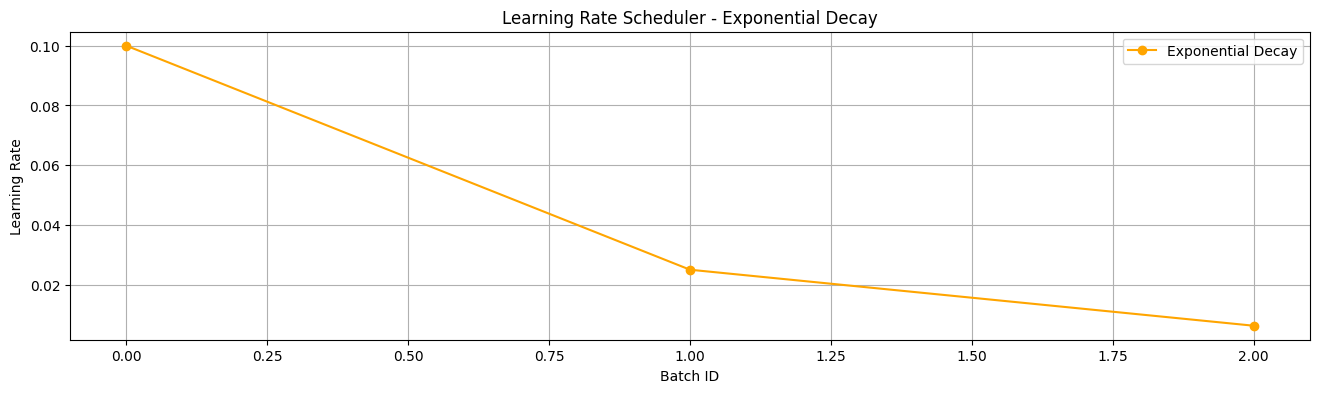

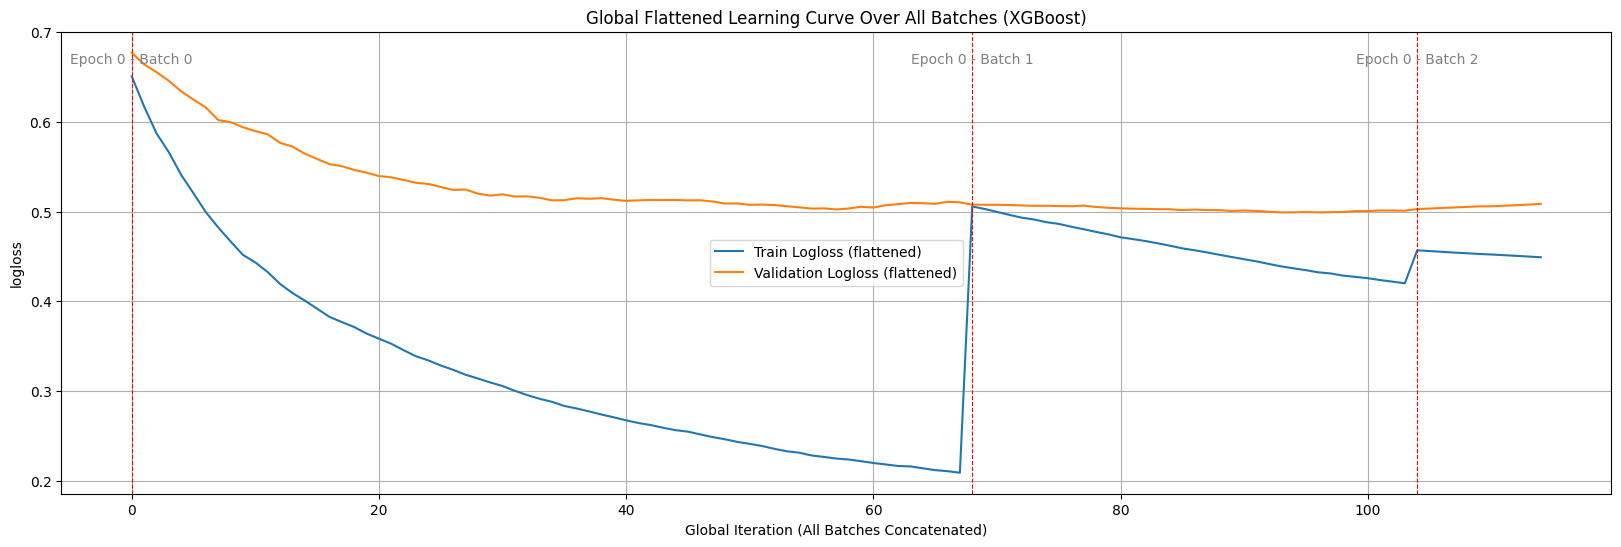

2025-09-04 13:51:59,048 - incrementaltraining.core.base_trainer - INFO - Completed fitting model for Batch 3.


In [12]:
import pprint
from sklearn.pipeline import Pipeline
from trainers.xgboost_trainer import XGBoostTrainer


print("Importing XGBoostTrainer")
trainer = XGBoostTrainer()
print("XGBoostTrainer imported and instantiated successfully:", trainer)

target_column = "Survived"

# Binaire
config_model = {
    "objective": "binary:logistic",  # classification binaire
    "eval_metric": "logloss",  # ["auc", "logloss"],  # suivre AUC et logloss
    "n_estimators": 600,  # équivalent à iterations
    "learning_rate": 0.05,
    "max_depth": 6,
    "reg_lambda": 3.0,  # l2_leaf_reg -> reg_lambda
    "subsample": 0.8,
    "colsample_bytree": 0.8,  # sous-échantillonnage des features
    "random_state": 42,
    # "verbosity": 1,                   # 0 = silent, 1 = warnings
    "verbose": 10,  # 0 = silent, 1 = warnings
    "early_stopping_rounds": 10,  # géré via fit()
}

config_lr_scheduler = {
    "initial_lr": 0.1,
    "decay_rate": 0.25,
}

print("===== Configuration XGBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    pipeline=None,
    num_batches=3,
    config_model=config_model,
    config_lr_scheduler=config_lr_scheduler,
)

In [ ]:
import pprint
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from trainers.catboost_trainer import CatBoostTrainer

# --- Colonnes ---
numeric_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
categorical_features = [
    "Gender",
    "CALC",
    "FAVC",
    "SCC",
    "SMOKE",
    "family_history_with_overweight",
    "CAEC",
    "MTRANS",
]

# --- Definition  ---

# Définition de la colonne cible
target_column = "NObeyesdad"

# Instanciation du trainer
print("Importing CatBoostTrainer")
trainer = CatBoostTrainer()
# print("CatBoostTrainer imported and instantiated successfully:", trainer)


# Multiclasse
config_model = {
    "loss_function": "MultiClass",
    "eval_metric": "TotalF1",  # <-- F1 multi-classe
    "iterations": 600,
    "learning_rate": 0.05,
    "depth": 6,
    "l2_leaf_reg": 3.0,
    "auto_class_weights": "Balanced",
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,
    "random_seed": 42,
    "verbose": True,  # print toutes les
    "early_stopping_rounds": 10,
    "use_best_model": True,
}

print("===== Configuration CatBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    pipeline=None,
    num_batches=3,
    config_model=config_model,
)

In [ ]:
import pandas as pd
from typing import Tuple, Optional
from sklearn.model_selection import train_test_split
from pyspark.sql import SparkSession


# 1) Train/Validation Split with stratification
def make_train_valid_split(
    df: pd.DataFrame,
    target: str,
    train_size: float = 0.8,
    val_size: float = 0.2,
    **kwargs,
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Split a pandas DataFrame into train/validation sets with optional stratification.

    Parameters
    ----------
    df : pd.DataFrame
        Full dataset (must include the target column).
    target : str
        Target column name.
    train_size : float, default=0.8
        Proportion for the train set.
    val_size : float, default=0.2
        Proportion for the validation set.
    **kwargs :
        Extra keyword arguments passed to sklearn's `train_test_split`.

    Returns
    -------
    (train_df, valid_df) : Tuple[pd.DataFrame, pd.DataFrame]
        Two pandas DataFrames containing all original columns.
    """
    if target not in df.columns:
        raise KeyError(f"Target column '{target}' is missing in DataFrame.")

    total = train_size + val_size
    if not (0.999 <= total <= 1.001):
        raise ValueError(
            f"train_size ({train_size}) + val_size ({val_size}) must sum to 1.0."
        )

    X = df.drop(columns=[target])
    y = df[target]

    # Default stratify behavior unless overridden in kwargs
    stratify_arg = kwargs.get("stratify", y)
    kwargs["stratify"] = stratify_arg if stratify_arg is not None else None

    X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        test_size=val_size,
        **kwargs,
    )

    train_df = pd.concat([X_train, y_train], axis=1)[df.columns]
    valid_df = pd.concat([X_valid, y_valid], axis=1)[df.columns]

    print(f"[SPLIT] Train shape: {train_df.shape} | Validation shape: {valid_df.shape}")
    try:
        print("[SPLIT] Target distribution (train):")
        print(train_df[target].value_counts(normalize=True).round(4))
        print("[SPLIT] Target distribution (validation):")
        print(valid_df[target].value_counts(normalize=True).round(4))
    except Exception:
        pass

    return train_df, valid_df


# 2) Pandas → Spark conversion
def to_spark_dfs(
    train_df: pd.DataFrame,
    valid_df: pd.DataFrame,
    spark: Optional[SparkSession] = None,
    app_name: str = "PandasToSpark",
    **kwargs,
):
    """
    Convert two pandas DataFrames into Spark DataFrames.

    Parameters
    ----------
    train_df : pd.DataFrame
        Training set in pandas.
    valid_df : pd.DataFrame
        Validation set in pandas.
    spark : Optional[SparkSession], default=None
        Existing Spark session. If None, a new one will be created.
    app_name : str, default="PandasToSpark"
        Name of the Spark application if a session is created.
    **kwargs :
        Extra keyword arguments passed to `spark.createDataFrame`.

    Returns
    -------
    (spark_train_df, spark_valid_df) : Tuple[DataFrame, DataFrame]
        Two Spark DataFrames.
    """
    if spark is None:
        spark = SparkSession.builder.appName(app_name).getOrCreate()

    spark_train_df = spark.createDataFrame(train_df, **kwargs)
    spark_valid_df = spark.createDataFrame(valid_df, **kwargs)

    print("[SPARK] Conversion successful → Spark DataFrames created.")
    print(
        f"[SPARK] Train rows: {spark_train_df.count()} | Validation rows: {spark_valid_df.count()}"
    )

    return spark_train_df, spark_valid_df


# Split with kwargs forwarded to sklearn
target_column = "NObeyesdad"  # Replace with your actual target column name
train_df, valid_df = make_train_valid_split(
    df,
    target=target_column,
    train_size=0.8,
    val_size=0.2,
    random_state=42,
    shuffle=True,
)

# Convert to Spark DataFrames
spark_train_df, spark_valid_df = to_spark_dfs(train_df, valid_df)

[SPLIT] Train shape: (1688, 17) | Validation shape: (423, 17)
[SPLIT] Target distribution (train):
NObeyesdad
Obesity_Type_I         0.1665
Obesity_Type_III       0.1534
Obesity_Type_II        0.1404
Overweight_Level_I     0.1374
Overweight_Level_II    0.1374
Normal_Weight          0.1357
Insufficient_Weight    0.1291
Name: proportion, dtype: float64
[SPLIT] Target distribution (validation):
NObeyesdad
Obesity_Type_I         0.1655
Obesity_Type_III       0.1537
Obesity_Type_II        0.1418
Normal_Weight          0.1371
Overweight_Level_II    0.1371
Overweight_Level_I     0.1371
Insufficient_Weight    0.1277
Name: proportion, dtype: float64


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/09/02 17:43:58 WARN Utils: Your hostname, MacBook-Air-di-Surel.local, resolves to a loopback address: 127.0.0.1; using 172.20.10.2 instead (on interface en0)
25/09/02 17:43:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/02 17:43:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


[SPARK] Conversion successful → Spark DataFrames created.


[SPARK] Train rows: 1688 | Validation rows: 423


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 58401)
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.11/3.11.9/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/homebrew/Cellar/python@3.11/3.11.9/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/opt/homebrew/Cellar/python@3.11/3.11.9/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/homebrew/Cellar/python@3.11/3.11.9/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socketserver.py", line 755, in __init__
    self.handle()
  File "/Users/surelmanda/Data-Science-Projects/IncrementalTraini

2025-09-02 17:44:10,985 - incrementaltraining.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for evaluation.


===== Configuration CatBoost =====
{'loss_function': 'MultiClass',
 'eval_metric': 'TotalF1',
 'iterations': 600,
 'learning_rate': 0.05,
 'depth': 6,
 'l2_leaf_reg': 3.0,
 'auto_class_weights': 'Balanced',
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.8,
 'random_seed': 42,
 'verbose': True,
 'early_stopping_rounds': 10,
 'use_best_model': True}
Applying fit method


2025-09-02 17:44:12,334 - incrementaltraining.core.base_trainer - INFO - Starting to process DataFrame in batches...
2025-09-02 17:44:12,336 - incrementaltraining.core.base_trainer - INFO - Creating batches...
2025-09-02 17:44:12,497 - incrementaltraining.core.base_trainer - INFO - Created 3 batches stratified by NObeyesdad
2025-09-02 17:44:12,497 - incrementaltraining.core.base_trainer - INFO - Batches created successfully.
2025-09-02 17:44:12,498 - incrementaltraining.core.base_trainer - INFO - Batches created and applied to DataFrame.
2025-09-02 17:44:12,498 - incrementaltraining.core.base_trainer - INFO - Filtering and processing batch 0
2025-09-02 17:44:12,535 - incrementaltraining.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 0
2025-09-02 17:44:14,978 - incrementaltraining.core.base_trainer - INFO - Processing batch 1 / 3
2025-09-02 17:44:14,985 - incrementaltraining.core.base_trainer - INFO - Identified categorical features: ['Gender', 'CALC

0:	learn: 0.6462212	test: 0.6462212	test1: 0.5956876	best: 0.5956876 (0)	total: 93.3ms	remaining: 55.9s
1:	learn: 0.7388155	test: 0.7388155	test1: 0.6731081	best: 0.6731081 (1)	total: 104ms	remaining: 31.1s
2:	learn: 0.7192349	test: 0.7174427	test1: 0.6395864	best: 0.6731081 (1)	total: 116ms	remaining: 23.1s
3:	learn: 0.7390037	test: 0.7390037	test1: 0.6813274	best: 0.6813274 (3)	total: 137ms	remaining: 20.5s
4:	learn: 0.7182215	test: 0.7182215	test1: 0.6749111	best: 0.6813274 (3)	total: 147ms	remaining: 17.4s
5:	learn: 0.7430610	test: 0.7430610	test1: 0.6899587	best: 0.6899587 (5)	total: 159ms	remaining: 15.7s
6:	learn: 0.7641658	test: 0.7641383	test1: 0.7140286	best: 0.7140286 (6)	total: 171ms	remaining: 14.5s
7:	learn: 0.7883951	test: 0.7802797	test1: 0.7272146	best: 0.7272146 (7)	total: 184ms	remaining: 13.6s
8:	learn: 0.7962652	test: 0.7845117	test1: 0.7233687	best: 0.7272146 (7)	total: 194ms	remaining: 12.8s
9:	learn: 0.8057173	test: 0.7886080	test1: 0.7410880	best: 0.7410880 (9)

2025-09-02 17:44:15,561 - incrementaltraining.core.base_trainer - INFO - Model trained on batch 1 / 3
2025-09-02 17:44:15,563 - incrementaltraining.core.base_trainer - INFO - Filtering and processing batch 1
2025-09-02 17:44:15,619 - incrementaltraining.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 1


45:	learn: 0.8755979	test: 0.8608366	test1: 0.7724389	best: 0.7805922 (40)	total: 494ms	remaining: 5.95s
46:	learn: 0.8864369	test: 0.8649446	test1: 0.7777826	best: 0.7805922 (40)	total: 502ms	remaining: 5.91s
47:	learn: 0.8884830	test: 0.8667214	test1: 0.7728361	best: 0.7805922 (40)	total: 510ms	remaining: 5.87s
48:	learn: 0.8886507	test: 0.8665495	test1: 0.7704525	best: 0.7805922 (40)	total: 518ms	remaining: 5.83s
49:	learn: 0.8868981	test: 0.8671144	test1: 0.7652802	best: 0.7805922 (40)	total: 525ms	remaining: 5.77s
50:	learn: 0.8904811	test: 0.8688295	test1: 0.7679799	best: 0.7805922 (40)	total: 533ms	remaining: 5.74s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.7805922284
bestIteration = 40

Shrink model to first 41 iterations.


2025-09-02 17:44:17,240 - incrementaltraining.core.base_trainer - INFO - Processing batch 2 / 3
2025-09-02 17:44:17,241 - incrementaltraining.core.base_trainer - INFO - Training model on batch 2 / 3


0:	learn: 0.7785380	test: 0.7785380	test1: 0.7752481	best: 0.7752481 (0)	total: 31.6ms	remaining: 18.9s
1:	learn: 0.7911365	test: 0.7911365	test1: 0.7848375	best: 0.7848375 (1)	total: 55.8ms	remaining: 16.7s
2:	learn: 0.7931595	test: 0.7931595	test1: 0.7928526	best: 0.7928526 (2)	total: 75.6ms	remaining: 15s
3:	learn: 0.7947375	test: 0.7947375	test1: 0.7952287	best: 0.7952287 (3)	total: 84.1ms	remaining: 12.5s
4:	learn: 0.8006261	test: 0.7986494	test1: 0.7953251	best: 0.7953251 (4)	total: 94.5ms	remaining: 11.2s
5:	learn: 0.8006261	test: 0.8043116	test1: 0.7977520	best: 0.7977520 (5)	total: 104ms	remaining: 10.3s
6:	learn: 0.8059685	test: 0.8062689	test1: 0.8002841	best: 0.8002841 (6)	total: 112ms	remaining: 9.49s
7:	learn: 0.8154505	test: 0.8137995	test1: 0.8005189	best: 0.8005189 (7)	total: 120ms	remaining: 8.91s
8:	learn: 0.8115085	test: 0.8118112	test1: 0.7953667	best: 0.8005189 (7)	total: 128ms	remaining: 8.43s
9:	learn: 0.8150942	test: 0.8118112	test1: 0.8028807	best: 0.8028807 (

2025-09-02 17:44:17,797 - incrementaltraining.core.base_trainer - INFO - Model trained on batch 2 / 3
2025-09-02 17:44:17,798 - incrementaltraining.core.base_trainer - INFO - Filtering and processing batch 2
2025-09-02 17:44:17,872 - incrementaltraining.core.base_trainer - INFO - Converting Spark DataFrame to pandas DataFrame for batch 2


45:	learn: 0.8787087	test: 0.8643033	test1: 0.8296528	best: 0.8345711 (43)	total: 435ms	remaining: 5.24s
46:	learn: 0.8802608	test: 0.8643033	test1: 0.8392765	best: 0.8392765 (46)	total: 442ms	remaining: 5.2s
47:	learn: 0.8784307	test: 0.8643775	test1: 0.8419941	best: 0.8419941 (47)	total: 452ms	remaining: 5.2s
48:	learn: 0.8784307	test: 0.8643775	test1: 0.8415438	best: 0.8419941 (47)	total: 457ms	remaining: 5.14s
49:	learn: 0.8803252	test: 0.8662364	test1: 0.8484734	best: 0.8484734 (49)	total: 467ms	remaining: 5.14s
50:	learn: 0.8841810	test: 0.8662364	test1: 0.8460602	best: 0.8484734 (49)	total: 475ms	remaining: 5.12s
51:	learn: 0.8841810	test: 0.8662364	test1: 0.8460404	best: 0.8484734 (49)	total: 482ms	remaining: 5.08s
52:	learn: 0.8910930	test: 0.8700338	test1: 0.8454574	best: 0.8484734 (49)	total: 491ms	remaining: 5.06s
53:	learn: 0.8910930	test: 0.8712826	test1: 0.8454574	best: 0.8484734 (49)	total: 497ms	remaining: 5.03s
54:	learn: 0.8895396	test: 0.8712826	test1: 0.8434482	bes

2025-09-02 17:44:18,687 - incrementaltraining.core.base_trainer - INFO - Processing batch 3 / 3
2025-09-02 17:44:18,688 - incrementaltraining.core.base_trainer - INFO - Training model on batch 3 / 3
2025-09-02 17:44:18,856 - incrementaltraining.core.base_trainer - INFO - Model trained on batch 3 / 3


0:	learn: 0.8403179	test: 0.8403179	test1: 0.8463180	best: 0.8463180 (0)	total: 25.7ms	remaining: 15.4s
1:	learn: 0.8421463	test: 0.8421463	test1: 0.8431041	best: 0.8463180 (0)	total: 35.3ms	remaining: 10.6s
2:	learn: 0.8477815	test: 0.8477815	test1: 0.8486351	best: 0.8486351 (2)	total: 46.1ms	remaining: 9.18s
3:	learn: 0.8512087	test: 0.8512087	test1: 0.8507508	best: 0.8507508 (3)	total: 54.4ms	remaining: 8.1s
4:	learn: 0.8569438	test: 0.8569438	test1: 0.8528943	best: 0.8528943 (4)	total: 58.2ms	remaining: 6.92s
5:	learn: 0.8620784	test: 0.8602432	test1: 0.8454404	best: 0.8528943 (4)	total: 67.2ms	remaining: 6.65s
6:	learn: 0.8622279	test: 0.8622279	test1: 0.8433193	best: 0.8528943 (4)	total: 74.2ms	remaining: 6.28s
7:	learn: 0.8691905	test: 0.8691905	test1: 0.8457573	best: 0.8528943 (4)	total: 82.2ms	remaining: 6.08s
8:	learn: 0.8713710	test: 0.8695944	test1: 0.8411829	best: 0.8528943 (4)	total: 89ms	remaining: 5.84s
9:	learn: 0.8746967	test: 0.8695944	test1: 0.8436824	best: 0.852894

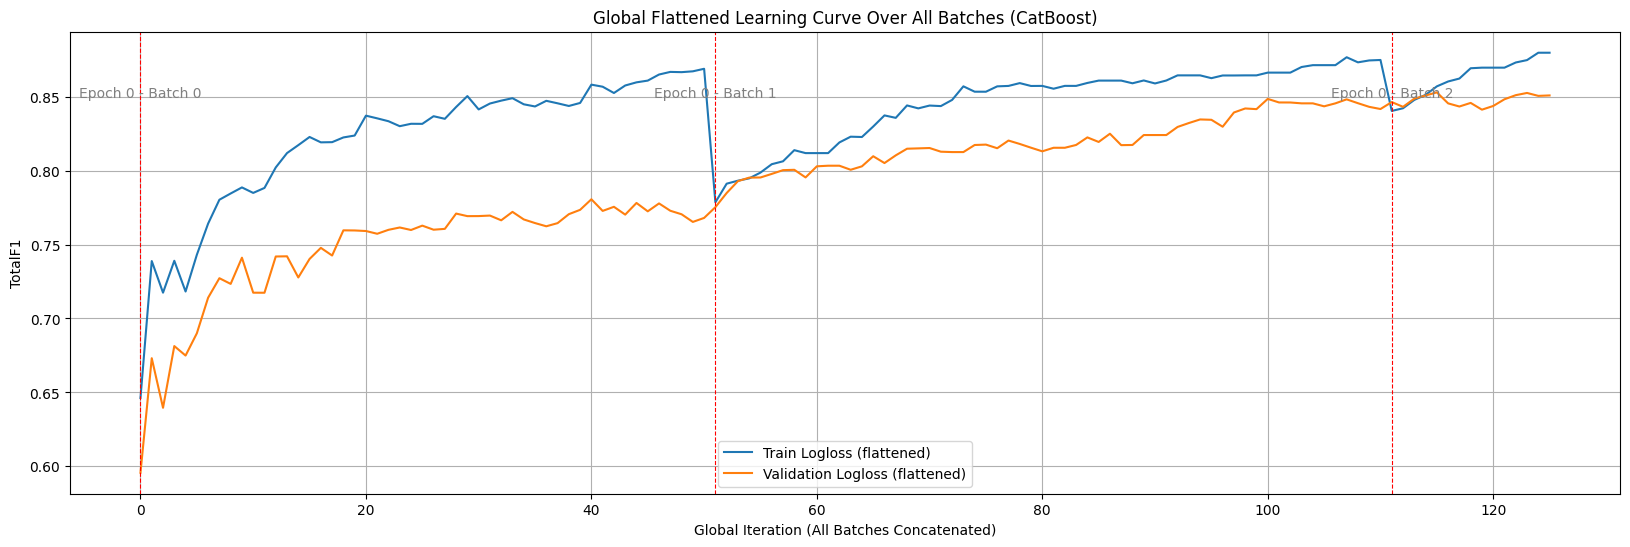

2025-09-02 17:44:18,968 - incrementaltraining.core.base_trainer - INFO - Training completed


25/09/02 22:30:01 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 923319 ms exceeds timeout 120000 ms
25/09/02 22:30:02 WARN SparkContext: Killing executors is not supported by current scheduler.
25/09/02 22:30:02 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:53)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:342)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:81)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:669)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1296)
	at o

In [ ]:
import pprint
from trainers.catboost_trainer import CatBoostTrainer

# --- Colonnes ---
numeric_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
categorical_features = [
    "Gender",
    "CALC",
    "FAVC",
    "SCC",
    "SMOKE",
    "family_history_with_overweight",
    "CAEC",
    "MTRANS",
]

# --- Definition  ---

# Définition de la colonne cible
target_column = "NObeyesdad"


# --- Preprocessor : scale NUM, garder CATEG telles quelles ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,  # => noms de colonnes lisibles
    sparse_threshold=0,  # force np.ndarray dense
)

# Pipeline complet
pipe = Pipeline(
    steps=[
        ("preprocess", preprocessor),
    ]
)


trainer = CatBoostTrainer()
# print("CatBoostTrainer imported and instantiated successfully:", trainer)


# Multiclasse
config_model = {
    "loss_function": "MultiClass",
    "eval_metric": "TotalF1",  # <-- F1 multi-classe
    "iterations": 600,
    "learning_rate": 0.05,
    "depth": 6,
    "l2_leaf_reg": 3.0,
    "auto_class_weights": "Balanced",
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,
    "random_seed": 42,
    "verbose": True,  # print toutes les
    "early_stopping_rounds": 10,
    "use_best_model": True,
}

print("===== Configuration CatBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

print("Applying fit method")
trainer.fit(
    train_dataframe=spark_train_df,
    valid_dataframe=spark_valid_df,
    target_column=target_column,
    pipeline=pipe,
    num_batches=3,
    config_model=config_model,
)

## Full Dataset Training (Non-Batch Mode)

===== Configuration CatBoost =====
{'loss_function': 'MultiClass',
 'eval_metric': 'TotalF1',
 'iterations': 600,
 'learning_rate': 0.05,
 'depth': 6,
 'l2_leaf_reg': 3.0,
 'auto_class_weights': 'Balanced',
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.8,
 'random_seed': 42,
 'verbose': True}
0:	learn: 0.6339219	test: 0.6303663	best: 0.6303663 (0)	total: 17.4ms	remaining: 10.4s
1:	learn: 0.6877730	test: 0.6891221	best: 0.6891221 (1)	total: 30.6ms	remaining: 9.16s
2:	learn: 0.7508230	test: 0.7596878	best: 0.7596878 (2)	total: 51ms	remaining: 10.1s
3:	learn: 0.7161996	test: 0.7410985	best: 0.7596878 (2)	total: 60.9ms	remaining: 9.08s
4:	learn: 0.7412257	test: 0.7447347	best: 0.7596878 (2)	total: 69.7ms	remaining: 8.3s
5:	learn: 0.7593631	test: 0.7700103	best: 0.7700103 (5)	total: 77.4ms	remaining: 7.66s
6:	learn: 0.7613532	test: 0.7621455	best: 0.7700103 (5)	total: 87.4ms	remaining: 7.4s
7:	learn: 0.7756767	test: 0.7725646	best: 0.7725646 (7)	total: 95.7ms	remaining: 7.08s
8:	learn: 0.

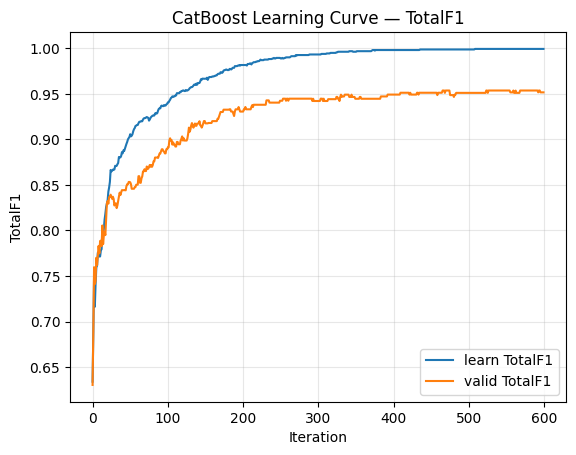

In [8]:
# --- Imports ---
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier, Pool

# --- Colonnes ---
numeric_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
categorical_features = [
    "Gender",
    "CALC",
    "FAVC",
    "SCC",
    "SMOKE",
    "family_history_with_overweight",
    "CAEC",
    "MTRANS",
]

# --- Split déjà fait en amont ---
target_column = "NObeyesdad"
X_train = train_df.drop(columns=[target_column]).copy()
y_train = train_df[target_column].copy()
X_valid = valid_df.drop(columns=[target_column]).copy()
y_valid = valid_df[target_column].copy()

# --- Dtypes catégoriels ---
for c in categorical_features:
    if c in X_train.columns:
        X_train[c] = X_train[c].astype("category")
        X_valid[c] = X_valid[c].astype("category")

# Indices des features catégorielles
cat_idx = [
    X_train.columns.get_loc(c) for c in categorical_features if c in X_train.columns
]

# --- Pools CatBoost ---
train_pool = Pool(X_train, y_train, cat_features=cat_idx)
valid_pool = Pool(X_valid, y_valid, cat_features=cat_idx)

# --- Config CatBoost (multiclasse) ---
config_model = {
    "loss_function": "MultiClass",
    "eval_metric": "TotalF1",  # F1 macro globale multi-classe
    "iterations": 600,  # itérations max (early stopping coupera avant)
    "learning_rate": 0.05,
    "depth": 6,
    "l2_leaf_reg": 3.0,
    "auto_class_weights": "Balanced",
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,
    "random_seed": 42,
    "verbose": True,  # log toutes les 200 itérations
    # Note: 'early_stopping_rounds' se passe à fit(...), pas dans le constructeur
}

print("===== Configuration CatBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")

model = CatBoostClassifier(**config_model)

# --- Entraînement + early stopping ---
model.fit(
    train_pool,
    eval_set=valid_pool,  # <--- utiliser le valid_pool
    use_best_model=True,
    # early_stopping_rounds=200,        # patience
)

# --- Évaluation ---
# Probas -> classes prédictes
proba_valid = model.predict_proba(X_valid)
y_pred = np.argmax(proba_valid, axis=1)

# Si y_valid est catégoriel/objets, factoriser pour le report lisible
if str(y_valid.dtype).startswith("category") or y_valid.dtype == "O":
    y_true_enc, class_names = pd.factorize(y_valid)
else:
    y_true_enc = y_valid.values
    class_names = np.unique(y_valid)

acc = accuracy_score(y_true_enc, y_pred)
print(f"\nAccuracy (valid): {acc:.4f}")
print(
    "\nClassification report (valid):\n",
    classification_report(
        y_true_enc, y_pred, target_names=[str(c) for c in class_names]
    ),
)
print("Confusion matrix (valid):\n", confusion_matrix(y_true_enc, y_pred))

# --- Tracer la courbe Train vs Validation ---
evals = model.get_evals_result()
# evals ressemble à {'learn': {'TotalF1': [...]}, 'validation': {'TotalF1': [...]}}

metric_to_plot = None
if "TotalF1" in evals.get("learn", {}):
    metric_to_plot = "TotalF1"
elif len(evals.get("learn", {})) > 0:
    metric_to_plot = list(evals["learn"].keys())[0]  # fallback: premier metric dispo

if metric_to_plot is not None:
    learn_vals = evals.get("learn", {}).get(metric_to_plot, None)
    valid_vals = evals.get("validation", {}).get(metric_to_plot, None)

    plt.figure()
    if learn_vals is not None:
        plt.plot(learn_vals, label=f"learn {metric_to_plot}")
    if valid_vals is not None:
        plt.plot(valid_vals, label=f"valid {metric_to_plot}")
    plt.xlabel("Iteration")
    plt.ylabel(metric_to_plot)
    plt.title(f"CatBoost Learning Curve — {metric_to_plot}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("Aucun metric disponible pour tracer les courbes.")

In [ ]:
evals

In [5]:
spark_valid_df.toPandas()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,19.084967,Female,1.768435,49.597765,Sometimes,yes,3.000000,3.725797,no,no,1.191401,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
1,19.000000,Male,1.800000,60.000000,no,yes,2.000000,3.000000,no,no,1.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
2,24.108711,Male,1.700000,80.761409,Sometimes,yes,2.000000,3.000000,no,no,2.879402,yes,0.000000,0.322405,Sometimes,Public_Transportation,Overweight_Level_II
3,20.941943,Female,1.812963,138.730619,Sometimes,yes,3.000000,3.000000,no,no,2.641489,yes,0.481555,0.735201,Sometimes,Public_Transportation,Obesity_Type_III
4,33.293166,Male,1.696412,103.250355,no,yes,2.679664,2.415522,no,no,1.000000,yes,1.987296,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,30.628650,Male,1.766975,118.363376,Sometimes,yes,2.964319,3.000000,no,no,2.377257,yes,0.614959,1.875023,Sometimes,Automobile,Obesity_Type_II
419,18.181821,Male,1.662669,79.863546,no,no,2.492758,2.270163,no,no,1.992586,yes,1.452467,0.864583,Sometimes,Public_Transportation,Overweight_Level_II
420,30.870724,Male,1.670774,101.626189,no,yes,2.907744,3.990925,no,no,1.000000,yes,1.999750,0.000000,Sometimes,Public_Transportation,Obesity_Type_II
421,20.000000,Male,1.560000,45.000000,Sometimes,no,2.000000,3.000000,no,no,2.000000,no,1.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score

# --- Colonnes ---
numeric_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
categorical_features = [
    "Gender",
    "CALC",
    "FAVC",
    "SCC",
    "SMOKE",
    "family_history_with_overweight",
    "CAEC",
    "MTRANS",
]

# --- Split ---

# Définition de la colonne cible
target_column = "NObeyesdad"

X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]

X_test = valid_df.drop(columns=[target_column])
y_test = valid_df[target_column]


# --- Preprocessor : scale NUM, garder CATEG telles quelles ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,  # => noms de colonnes lisibles
    sparse_threshold=0,  # force np.ndarray dense
)

# Fit uniquement sur TRAIN (pas de fuite)
preprocessor.fit(X_train)

# Transform + reconstruire DataFrame avec noms
feature_names = preprocessor.get_feature_names_out()
X_train_tr = pd.DataFrame(
    preprocessor.transform(X_train), columns=feature_names, index=X_train.index
)
X_test_tr = pd.DataFrame(
    preprocessor.transform(X_test), columns=feature_names, index=X_test.index
)

print("show train dataframe")
display(X_train_tr.head())
print(X_train_tr.shape)

print("show test dataframe")
display(X_test_tr)
print(X_test_tr.shape)


# --- S’assurer que les colonnes catégorielles ont un dtype catégoriel/objet ---
for c in categorical_features:
    if c in X_train_tr.columns:
        X_train_tr[c] = X_train_tr[c].astype("category")
        X_test_tr[c] = X_test_tr[c].astype("category")

# Indices des features catégorielles après transformation
cat_idx = [X_train_tr.columns.get_loc(c) for c in categorical_features]

# --- CatBoost ---
train_pool = Pool(X_train_tr, y_train, cat_features=cat_idx)
test_pool = Pool(X_test_tr, y_test, cat_features=cat_idx)


import pprint

# Multiclasse
config_model = {
    "loss_function": "MultiClass",
    "eval_metric": "TotalF1",  # <-- F1 multi-classe
    "iterations": 1000,
    "learning_rate": 0.05,
    "depth": 6,
    "l2_leaf_reg": 3.0,
    "auto_class_weights": "Balanced",
    "bootstrap_type": "Bernoulli",
    "subsample": 0.8,
    "random_seed": 42,
    "verbose": True,  # print toutes les
    "early_stopping_rounds": 50,
}

print("===== Configuration CatBoost =====")
pprint.pprint(config_model, sort_dicts=False)
print("=================================")


model = CatBoostClassifier(
    loss_function="MultiClass",
    iterations=700,
    learning_rate=0.08,
    depth=6,
    random_seed=42,
    verbose=False,
)
model = CatBoostClassifier(**config_model)
model.fit(train_pool, eval_set=test_pool)
y_pred = model.predict(test_pool)

print("Accuracy :", accuracy_score(y_test, y_pred))

show train dataframe


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS
459,-0.830923,0.620541,-0.289869,-0.809585,0.402353,1.601927,-0.024257,2.242022,Male,Frequently,yes,no,no,yes,Frequently,Public_Transportation
426,-0.361495,0.513995,-0.635417,-0.809585,0.402353,1.601927,-0.024257,0.576454,Male,no,no,no,no,no,Sometimes,Public_Transportation
326,-0.987399,-0.018735,-1.199811,1.080202,0.402353,-0.029305,2.336114,-1.089115,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation
971,-0.751685,1.307219,0.042472,0.690076,1.419764,0.67059,1.267506,-0.43395,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation
892,-1.130536,-1.770158,-1.124592,-0.861469,-0.449641,-0.50061,-1.091715,0.894666,Female,Sometimes,yes,yes,no,no,Sometimes,Public_Transportation


(1688, 16)
show test dataframe


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS
572,-0.817628,0.710413,-1.418744,1.080202,1.338737,-1.348318,1.155928,0.576454,Female,Sometimes,yes,no,no,no,Sometimes,Public_Transportation
370,-0.830923,1.046725,-1.019359,-0.809585,0.402353,-1.660537,-0.024257,0.576454,Male,no,yes,no,no,no,Sometimes,Public_Transportation
1002,-0.031532,-0.018735,-0.222241,-0.809585,0.402353,1.405203,-1.204443,-0.552127,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation
1837,-0.527055,1.18484,2.00344,1.080202,0.402353,1.017112,-0.636119,0.135413,Female,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation
1724,1.405617,-0.056963,0.641204,0.474835,-0.351708,-1.660537,1.140935,-1.089115,Male,no,yes,no,no,yes,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,0.988683,0.694857,1.221456,1.012773,0.402353,0.586088,-0.478677,2.033865,Male,Sometimes,yes,no,no,yes,Sometimes,Automobile
1161,-0.958949,-0.416481,-0.256714,0.121623,-0.539243,-0.041399,0.509738,0.350908,Male,no,no,no,no,yes,Sometimes,Public_Transportation
1537,1.026562,-0.330126,0.578846,0.905858,1.680791,-1.660537,1.155633,-1.089115,Male,no,yes,no,no,yes,Sometimes,Public_Transportation
497,-0.674447,-1.510378,-1.595272,-0.809585,0.402353,-0.029305,-0.024257,0.576454,Male,Sometimes,no,no,no,no,Sometimes,Public_Transportation


(423, 16)
===== Configuration CatBoost =====
{'loss_function': 'MultiClass',
 'eval_metric': 'TotalF1',
 'iterations': 1000,
 'learning_rate': 0.05,
 'depth': 6,
 'l2_leaf_reg': 3.0,
 'auto_class_weights': 'Balanced',
 'bootstrap_type': 'Bernoulli',
 'subsample': 0.8,
 'random_seed': 42,
 'verbose': True,
 'early_stopping_rounds': 50}
0:	learn: 0.6339219	test: 0.6303663	best: 0.6303663 (0)	total: 87.8ms	remaining: 1m 27s
1:	learn: 0.6877730	test: 0.6891221	best: 0.6891221 (1)	total: 103ms	remaining: 51.3s
2:	learn: 0.7508230	test: 0.7596878	best: 0.7596878 (2)	total: 120ms	remaining: 39.9s
3:	learn: 0.7161996	test: 0.7410985	best: 0.7596878 (2)	total: 128ms	remaining: 31.8s
4:	learn: 0.7412257	test: 0.7447347	best: 0.7596878 (2)	total: 138ms	remaining: 27.4s
5:	learn: 0.7593631	test: 0.7700103	best: 0.7700103 (5)	total: 150ms	remaining: 24.8s
6:	learn: 0.7613532	test: 0.7621455	best: 0.7700103 (5)	total: 165ms	remaining: 23.4s
7:	learn: 0.7756767	test: 0.7725646	best: 0.7725646 (7)	tot

In [1]:
from pathlib import Path
from sys import path

ROOT = Path().resolve().parent
print(f"Root directory: {ROOT}")
print(f"Current sys.path: {path}")
if str(ROOT) not in path:
    path.insert(0, str(ROOT))
    print(f"Added {ROOT} to sys.path")



Root directory: /Users/surelmanda/Data-Science-Projects/IncrementalTraining/incrementaltraining
Current sys.path: ['/opt/homebrew/Cellar/python@3.11/3.11.9/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/opt/homebrew/Cellar/python@3.11/3.11.9/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/opt/homebrew/Cellar/python@3.11/3.11.9/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/Users/surelmanda/Data-Science-Projects/IncrementalTraining/.venv/lib/python3.11/site-packages', '/Users/surelmanda/Data-Science-Projects/IncrementalTraining']
Added /Users/surelmanda/Data-Science-Projects/IncrementalTraining/incrementaltraining to sys.path


ImportError: cannot import name 'BatchTrainer' from 'core' (unknown location)

In [4]:
from pyspark.sql import SparkSession

# créer une SparkSession
spark = SparkSession.builder.appName("TestPoetrySpark").getOrCreate()

# créer un petit DataFrame Spark
df = spark.createDataFrame(
    [(1, "Alice", 23), (2, "Bob", 35), (3, "Charlie", 29)], ["id", "name", "age"]
)

df.show()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/08/31 18:32:57 WARN Utils: Your hostname, MacBook-Air-di-Surel.local, resolves to a loopback address: 127.0.0.1; using 172.20.10.2 instead (on interface en0)
25/08/31 18:32:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/31 18:32:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+---+-------+---+
| id|   name|age|
+---+-------+---+
|  1|  Alice| 23|
|  2|    Bob| 35|
|  3|Charlie| 29|
+---+-------+---+

